In [ ]:

import sys
!{sys.executable} -m pip install astropy
from astropy.table import Table
import numpy as np
import pandas as pd
import scipy as scipy
from scipy import optimize
np.set_printoptions(threshold=np.inf)

In [2]:
from astropy.table import Table
dat = Table.read('/Users/edm/Desktop/Gaia Data/Original/GCNS_cat.fits', format='fits')
df = dat.to_pandas()

In [3]:
df.columns
gj = df.loc[df['SOURCE_ID'] == 4270814637616488064]


In [4]:
df.loc[df['SOURCE_ID'] == 4270814637616488064]


,SOURCE_ID,RA,RA_ERROR,DEC,DEC_ERROR,PARALLAX,PARALLAX_ERROR,PMRA,PMRA_ERROR,PMDEC,...,K_MSIG_2MASS,NAME_WISE,W1MPRO_PM_WISE,W1SIGMPRO_PM_WISE,W2MPRO_PM_WISE,W2SIGMPRO_PM_WISE,W3MPRO_WISE,W3SIGMPRO_WISE,W4MPRO_WISE,W4SIGMPRO_WISE
250985,4270814637616488064,274.961836,0.015334,-1.938613,0.014947,52.396292,0.01711,-0.414064,0.019433,-0.108475,...,0.023,b'J181950.86-015618.7 ',6.731,0.026,6.355,0.012,6.195,0.016,6.125,0.051


In [5]:
print(gj)

                  SOURCE_ID          RA  RA_ERROR       DEC  DEC_ERROR  \
250985  4270814637616488064  274.961836  0.015334 -1.938613   0.014947   

         PARALLAX  PARALLAX_ERROR      PMRA  PMRA_ERROR     PMDEC  ...  \
250985  52.396292         0.01711 -0.414064    0.019433 -0.108475  ...   

        K_MSIG_2MASS                NAME_WISE  W1MPRO_PM_WISE  \
250985         0.023  b'J181950.86-015618.7 '           6.731   

        W1SIGMPRO_PM_WISE  W2MPRO_PM_WISE  W2SIGMPRO_PM_WISE  W3MPRO_WISE  \
250985              0.026           6.355              0.012        6.195   

        W3SIGMPRO_WISE  W4MPRO_WISE  W4SIGMPRO_WISE  
250985           0.016        6.125           0.051  

[1 rows x 74 columns]


In [6]:
Star = Table.read("/Users/edm/Desktop/Gaia Data/Original/Table3_ResolvedStellarSystems.fits", format='fits')
print(Star)

     sourceID1           sourceID2      separation ...  coma hyades bound
                                          arcsec   ...                   
------------------- ------------------- ---------- ... ----- ------ -----
     83154862613888      83154861954304     3.8353 ... false  false true 
    554329954689280     554329954689152     3.7164 ... false  false true 
   1611029348657664    1611029348487680     6.1252 ... false  false true 
   1950331764866304    1962117155125760     9.3117 ... false  false true 
   1950331764866304    1962117155125888    11.6604 ... false  false true 
   1962117155125888    1962117155125760     2.7914 ... false  false true 
   2048493242810496    2048497537393792     1.6040 ... false  false true 
   2058736739430272    2058736739430144    21.2564 ... false  false true 
   2769330488563712    2769330487975040     1.8195 ... false  false true 
   3041665774826112    3041665774825984     2.8693 ... false  false true 
                ...                 ..

In [7]:
star2 = Table.read("/Users/edm/Desktop/Gaia Data/Original/GCNS_cat.fits", format='fits')
print(star2)

     SOURCE_ID               RA          ... W4MPRO_WISE W4SIGMPRO_WISE
------------------- -------------------- ... ----------- --------------
2334666126716440064 0.002564982563575165 ...       9.074            nan
2341871673090078592 0.005120969206988805 ...       6.704          0.077
 530861741656374272 0.005636916793870935 ...       8.649          0.333
2745400068346761216 0.009336098664272003 ...       8.881            nan
2855176271335676800 0.013536449221259565 ...       9.077            nan
4616265759236854016 0.014892523503159586 ...       9.303            nan
2875125810310195712   0.0157909355502497 ...       6.824          0.085
2335003848584711040 0.015910163631347198 ...       8.804            nan
2773793203786254208 0.016520119186351646 ...       8.951            nan
2740326852975975040  0.01967903634957893 ...       8.334            nan
                ...                  ... ...         ...            ...
2415620208636803584    359.9884768664858 ...       8.794        

In [8]:
Star3 = Table.read("/Users/edm/Desktop/Gaia Data/Original/Hyades_ComaBer.fits", format='fits')
print(Star3)

      source_id         name  c_cluster dist_cluster
                                             pc     
--------------------- ------- --------- ------------
  3312644885984344704 Hyades      0.574        0.741
  3313285110990793472 Hyades      0.115        0.749
  3314137846679343872 Hyades      0.239        0.943
  3312536927686011520 Hyades      5.601        0.958
  3312904233289409152 Hyades      0.330        1.072
  3314109916508904064 Hyades      2.306        1.091
  3313173957237081984 Hyades      0.562        1.143
  3313751441358252160 Hyades      2.621        1.148
  3312709379213017728 Hyades      0.078        1.181
  3314212068010812032 Hyades      0.274        1.232
                  ...     ...       ...          ...
  1260123858250996608 ComaBer     2.377       35.203
  1259987931126020736 ComaBer     1.170       35.518
  1453164564983764224 ComaBer     6.979       36.220
  1285098955638193792 ComaBer     1.078       37.766
  1284742920029261312 ComaBer     9.249       

 Note (1) Dimensionless chi-square test statistic. Small values indicate highly  [astropy.io.fits.card]


In [9]:
Star4 = Table.read("/Users/edm/Desktop/Gaia Data/Original/distance_PDF.fits", format='fits')
print(Star4)

      source_id        dist_1   dist_2  ... dist_99  mn_acc_frac mn_cor_time
                        kpc      kpc    ...   kpc                           
--------------------- -------- -------- ... -------- ----------- -----------
        5192616270720 0.122540 0.122677 ... 0.125675       0.816        27.3
       16531329957376 0.116485 0.116567 ... 0.117803       0.801        24.3
       31958852451968 0.111975 0.112276 ... 0.117752       0.811        36.8
       41888816866304 0.089290 0.089472 ... 0.092023       0.808        24.9
       44358422235136 0.104162 0.104214 ... 0.105103       0.814        23.5
       44362718023680 0.103748 0.103869 ... 0.105750       0.808        33.6
       59858959995264 0.113397 0.113743 ... 0.118411       0.810        32.4
       74698071455360 0.065073 0.065313 ... 0.069489       0.807        44.1
       77863462880768 0.065469 0.065491 ... 0.065881       0.803        24.8
       83154861954304 0.063476 0.063505 ... 0.063903       0.810        34.2

In [10]:
print(Star.colnames)

['sourceID1', 'sourceID2', 'separation', 'magDiff', 'projSep', 'binary', 'coma', 'hyades', 'bound']


In [11]:
print(star2.colnames)

['SOURCE_ID', 'RA', 'RA_ERROR', 'DEC', 'DEC_ERROR', 'PARALLAX', 'PARALLAX_ERROR', 'PMRA', 'PMRA_ERROR', 'PMDEC', 'PMDEC_ERROR', 'PHOT_G_MEAN_MAG', 'PHOT_G_MEAN_FLUX_OVER_ERROR', 'PHOT_BP_MEAN_MAG', 'PHOT_BP_MEAN_FLUX_OVER_ERROR', 'PHOT_RP_MEAN_MAG', 'PHOT_RP_MEAN_FLUX_OVER_ERROR', 'PHOT_BP_RP_EXCESS_FACTOR', 'RUWE', 'IPD_FRAC_MULTI_PEAK', 'ADOPTEDRV', 'ADOPTEDRV_ERROR', 'ADOPTEDRV_REFNAME', 'RADIAL_VELOCITY_IS_VALID', 'GCNS_PROB', 'WD_PROB', 'DIST_1', 'DIST_16', 'DIST_50', 'DIST_84', 'XCOORD_50', 'XCOORD_16', 'XCOORD_84', 'YCOORD_50', 'YCOORD_16', 'YCOORD_84', 'ZCOORD_50', 'ZCOORD_16', 'ZCOORD_84', 'UVEL_50', 'UVEL_16', 'UVEL_84', 'VVEL_50', 'VVEL_16', 'VVEL_84', 'WVEL_50', 'WVEL_16', 'WVEL_84', 'NAME_GUNN', 'REFNAME_GUNN', 'GMAG_GUNN', 'E_GMAG_GUNN', 'RMAG_GUNN', 'E_RMAG_GUNN', 'IMAG_GUNN', 'E_IMAG_GUNN', 'ZMAG_GUNN', 'E_ZMAG_GUNN', 'NAME_2MASS', 'J_M_2MASS', 'J_MSIG_2MASS', 'H_M_2MASS', 'H_MSIG_2MASS', 'K_M_2MASS', 'K_MSIG_2MASS', 'NAME_WISE', 'W1MPRO_PM_WISE', 'W1SIGMPRO_PM_WISE', '

In [12]:
print(Star3.colnames)

['source_id', 'name', 'c_cluster', 'dist_cluster']


In [13]:
#turns each into usable arrays
#radial velocity
Rvel = np.asarray(gj["ADOPTEDRV"])
#print(Rvel)
#median x velocity
MVx = np.asarray(gj['UVEL_50'])
#print(MVx)
#median y velocity
MVy = np.asarray(gj['VVEL_50'])
#print(MVy)
#Proper Motion Dec
PMD = np.asarray(gj['PMDEC'])
#print(PMD)
#proper motion RA
PMR = np.asarray(gj['PMRA'])
#print(PMR)
#parallax
Para = np.asarray(gj['PARALLAX'])
#print(Para)
#median distance
med_d = np.asarray(gj['DIST_50'])
print(med_d)
#median velocity
med_v = np.sqrt(MVx**2+MVy**2)
print(med_v)
Rp = np.asarray(gj['PHOT_RP_MEAN_MAG'])
#print(Rp)
Bp = np.asarray(gj['PHOT_BP_MEAN_MAG'])
#print(Bp)
Mg = np.asarray(gj['PHOT_G_MEAN_MAG'])
#print(Mg)

[0.01908564]
[14.47646516]


In [14]:
BpRp = np.asarray(Bp - Rp)
print(BpRp)
len(BpRp)

[1.693725]


1

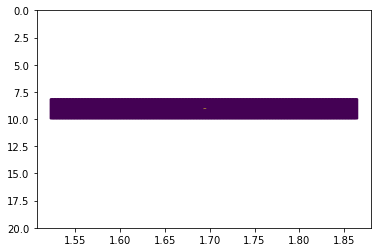

In [15]:
import matplotlib.pyplot as plt 
plt.hexbin(BpRp,Mg)
ymin, ymax = plt.ylim(20,0)

In [16]:
def value(s):
    try:
        return float(s)
    except ValueError:
        return 0

In [17]:
data = np.loadtxt('/Users/edm/Desktop/EEM_dwarf_UBVIJHK_colors_Teff.txt',usecols=(11), comments='#',dtype='str',  converters={11: value})
#does not print with ... so hd to replace with 0's

In [18]:
data = data.astype('float64')

In [19]:
print(data)
len(data)

[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00 -1.20e-01 -8.70e-02 -3.70e-02  5.00e-03
  6.80e-02  1.10e-01  1.66e-01  1.94e-01  2.22e-01  2.63e-01  3.20e-01
  3.27e-01  3.77e-01  4.34e-01  4.90e-01  5.18e-01  5.46e-01  5.87e-01
  6.40e-01  6.70e-01  6.94e-01  7.19e-01  7.67e-01  7.84e-01  8.03e-01
  8.23e-01  8.32e-01  8.41e-01  8.50e-01  8.69e-01  8.80e-01  9.00e-01
  9.50e-01  9.83e-01  1.01e+00  1.10e+00  1.21e+00  1.34e+00  1.43e+00
  1.53e+00  1.70e+00  1.73e+00  1.79e+00  1.84e+00  1.97e+00  2.09e+00
  2.13e+00  2.23e+00  2.39e+00  2.50e+00  2.78e+00  2.94e+00  3.16e+00
  3.35e+00  3.71e+00  4.16e+00  4.50e+00  4.65e+00  4.72e+00  4.86e+00
  5.10e+00  4.78e+00  4.86e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00

118

In [20]:
def value2(s2):
    try:
        return float(s2)
    except ValueError:
        return 0

In [21]:
data2 = np.loadtxt('/Users/edm/Desktop/EEM_dwarf_UBVIJHK_colors_Teff.txt',usecols=(30), comments='#',dtype='str',  converters={30: value2})


In [22]:
data2 = data2.astype('float64')
data21 = np.asarray(data2)
data11 = np.asarray(data)
new_data = data21[6 : 69]
print(new_data)
len(new_data)

new_data2 = data11[24 : 87]
print(new_data2)
len(new_data2)

[27.    25.    23.    21.3   19.8   18.5   17.7   15.    11.    10.
  7.3    6.     5.4    5.1    4.7    4.3    3.92   3.38   2.75   2.68
  2.18   2.05   1.98   1.86   1.93   1.88   1.83   1.77   1.81   1.75
  1.61   1.5    1.46   1.44   1.38   1.33   1.25   1.21   1.18   1.13
  1.08   1.06   1.03   1.     0.99   0.985  0.98   0.97   0.95   0.94
  0.9    0.88   0.86   0.82   0.78   0.73   0.7    0.69   0.64   0.62
  0.59   0.57   0.54 ]
[-1.20e-01 -8.70e-02 -3.70e-02  5.00e-03  6.80e-02  1.10e-01  1.66e-01
  1.94e-01  2.22e-01  2.63e-01  3.20e-01  3.27e-01  3.77e-01  4.34e-01
  4.90e-01  5.18e-01  5.46e-01  5.87e-01  6.40e-01  6.70e-01  6.94e-01
  7.19e-01  7.67e-01  7.84e-01  8.03e-01  8.23e-01  8.32e-01  8.41e-01
  8.50e-01  8.69e-01  8.80e-01  9.00e-01  9.50e-01  9.83e-01  1.01e+00
  1.10e+00  1.21e+00  1.34e+00  1.43e+00  1.53e+00  1.70e+00  1.73e+00
  1.79e+00  1.84e+00  1.97e+00  2.09e+00  2.13e+00  2.23e+00  2.39e+00
  2.50e+00  2.78e+00  2.94e+00  3.16e+00  3.35e+00  3.71e+00  

63

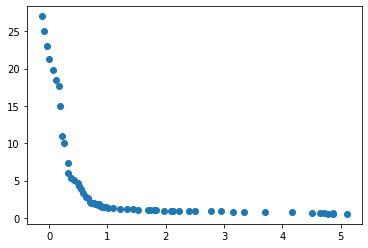

In [23]:
#concatanating 1d arrays code does not iterate over float
scatter = plt.scatter(new_data2,new_data)

In [24]:
def exponential(x, a, k, b):
    return a*np.exp(x*k) + b

In [25]:
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, new_data2, new_data, p0=[1,-0.5, 1])

In [26]:
perr_exponential = np.sqrt(np.diag(pcov_exponential))
print("pre-exponential factor = %0.2f (+/-) %0.2f" % (popt_exponential[0], perr_exponential[0]))
print("rate constant = %0.2f (+/-) %0.2f" % (popt_exponential[1], perr_exponential[1]))

pre-exponential factor = 20.38 (+/-) 0.46
rate constant = -2.92 (+/-) 0.13


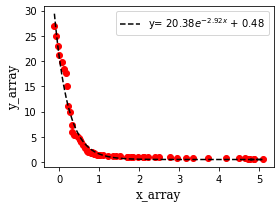

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize

from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(new_data2, new_data, "ro")
ax1.plot(new_data2, exponential(new_data2, *popt_exponential), 'k--', \
         label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))


ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.legend(loc='best')



fig.tight_layout()
fig.savefig("fittedExponential.png", format="png",dpi=1000)


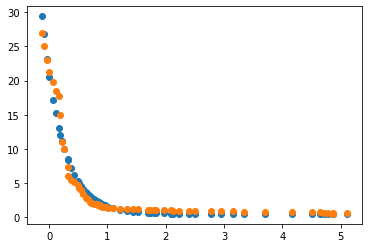

In [28]:
import math
#y = 20.38*np.exp(-2.92*x) + .48
#equation to approximate the mass

plt.scatter(new_data2, 20.38*np.exp(-2.92*new_data2) + .48)
scatter = plt.scatter(new_data2,new_data)

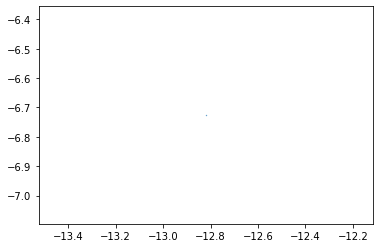

In [29]:
import matplotlib.pyplot as plt
plt.scatter(MVx, MVy, .1)

In [30]:
#transverse velocity
Tvel = (4.74047)*((np.sqrt((PMR**2) + (PMD**2)))/(Para))
print(Tvel)
len(Tvel)

[0.03872595]


1

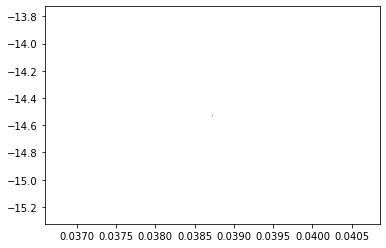

In [31]:
plt.scatter(Tvel, Rvel, .1)

In [32]:
vel = np.sqrt(Tvel**2 + Rvel**2)

Text(0, 0.5, 'd/pc')

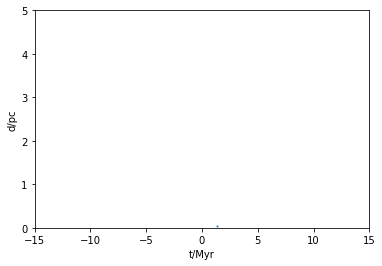

In [33]:

#time per year 
t = (-(10**3/Para))*(Rvel/(vel**2))
#Dont forget to make sure units work out
d = (10**3)*(1/Para)*(Tvel/(vel))
plt.scatter(t,d,1)

xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)

plt.xlabel("t/Myr")
plt.ylabel("d/pc")

In [34]:
len(d)

1

In [35]:
len(t)

1

In [36]:
#equation to find mass
y = (20.38*np.exp(-2.92*BpRp) + .48)
print(y)

[0.62498529]


In [37]:
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
#area = (1.35)/(14.5*0.000068)
#df = pd.DataFrame({'T': t,'D': d,"bubble_size":area})


Text(0, 0.5, 'perihelion (d)/pc')

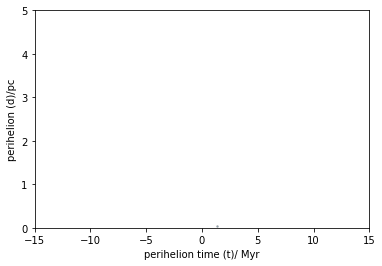

In [39]:

area = (y)/(med_d*med_v)
plt.scatter(t, d, area, alpha = .3, edgecolor = 'black')
plt.scatter(t,d,1)
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)
plt.xlabel("perihelion time (t)/ Myr")
plt.ylabel("perihelion (d)/pc")

In [40]:
print(med_v)

[14.47646516]


max(y)

In [67]:
max(med_d)

0.11931340668779827

In [69]:
max(med_v)

nan

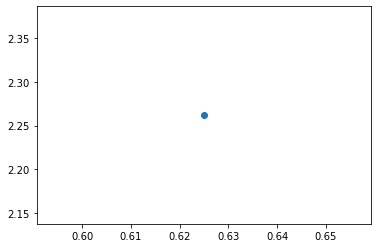

In [41]:
plt.scatter(y,area)

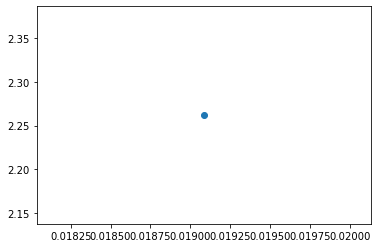

In [42]:
plt.scatter(med_d, area)

In [43]:
area_new = np.asarray(area)

In [44]:
maxElement = np.amax(area_new)
print('Max element from Numpy Array : ', maxElement)

Max element from Numpy Array :  2.2620414537028912


In [45]:
area2 = np.pi*(y/(med_v*(med_d**2)))
df = pd.DataFrame({'T': t,'D': d, "bubble_size":area2})

In [ ]:
plt.scatter(t, d, area2, alpha = .3, edgecolor = 'black', facecolor = 'none')
plt.scatter(t,d,1)
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)
plt.xlabel("perihelion time (t)/ Myr")
plt.ylabel("perihelion (d)/pc)")

In [ ]:
#turns each into usable arrays
#radial velocity
Rvel = np.asarray(star2["ADOPTEDRV"])
print(Rvel)
#median x velocity
MVx = np.asarray(star2['UVEL_50'])
print(MVx)
#median y velocity
MVy = np.asarray(star2['VVEL_50'])
print(MVy)
#Proper Motion Dec
PMD = np.asarray(star2['PMDEC'])
print(PMD)
#proper motion RA
PMR = np.asarray(star2['PMRA'])
print(PMR)
#parallax
Para = np.asarray(star2['PARALLAX'])
print(Para)
#median distance
med_d = np.asarray(star2['DIST_50'])
print(med_d)
#median velocity
med_v = np.sqrt(MVx**2+MVy**2)
Rp = np.asarray(star2['PHOT_RP_MEAN_MAG'])
print(Rp)
Bp = np.asarray(star2['PHOT_BP_MEAN_MAG'])
print(Bp)
Mg = np.asarray(star2['PHOT_G_MEAN_MAG'])
print(Mg)